<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<center><font size="8pt">Classification with Support Vector Machine</font></center>

# Introduction 

This `R` tutorial deals with Support Vector Machine (SVM) for classification. The aim is to illustrate the importance of the kernel choice and the tuning of the parameters by cross validation on different simulated data. 

It uses the `svm()` function of the `e1071` package. 

## About the `svm()` function

**Q:** Load the `e1071` package. What kernels does it contain?

In [4]:
library('e1071')

In [11]:
help("e1071")


No documentation for ‘e1071’ in specified packages and libraries:
you could try ‘??e1071’

## Factor simulation

In the following, the factors $(X_i)_{1\leq i\leq n}$ are the same in all cases and are uniformly distributed on $[-1,1]\times [0,1]$. The difference between the different cases lies in the boundary form which classifies the points. We simulate a training set with `n=200` observations, and a test set with `ntest=100` points. 

In [9]:
# Training set:
n <- 200
x1 <- runif(n, min=-1, max=1)
x2 <- runif(n, min=0, max=1)
t <- seq(-1, 1, length=100)

# Test set:
ntest <- 100
x1test <- runif(ntest, min=-1, max=1)
x2test <- runif(ntest, min=0, max=1)

# Linear boundary

First, we assume that the points are linearly separated. 

## Data simulation

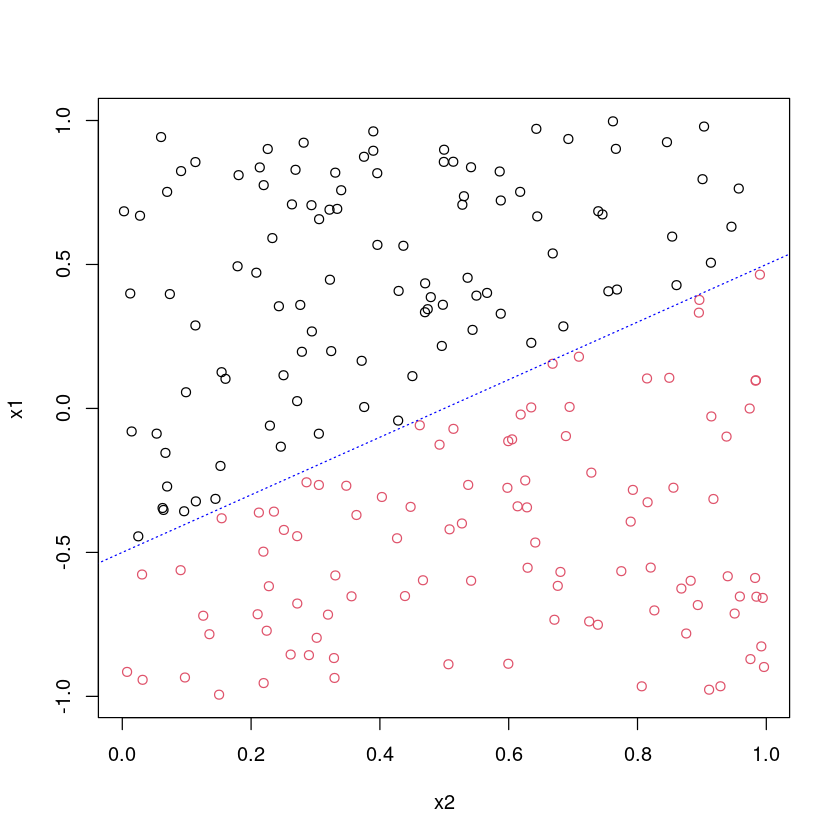

In [16]:
boundFunLin <- function(x1){
  x1 + 0.5
}

# Training set
gLin <- as.factor(x2 > boundFunLin(x1))
dataTrainLin <- data.frame(x1 = x1, x2 = x2, g = gLin)
plot(x2, x1, col=as.numeric(gLin))
lines(boundFunLin(t), t, col="blue", lty = "dotted")

# Test set
gLintest <- as.factor(x2test > boundFunLin(x1test))
dataTestLin <- data.frame(x1 = x1test, x2 = x2test, g = gLintest)
# points(x2test, x1test, col=as.numeric(gLintest),pch=10)


## Linear SVM

We first use a linear kernel. 

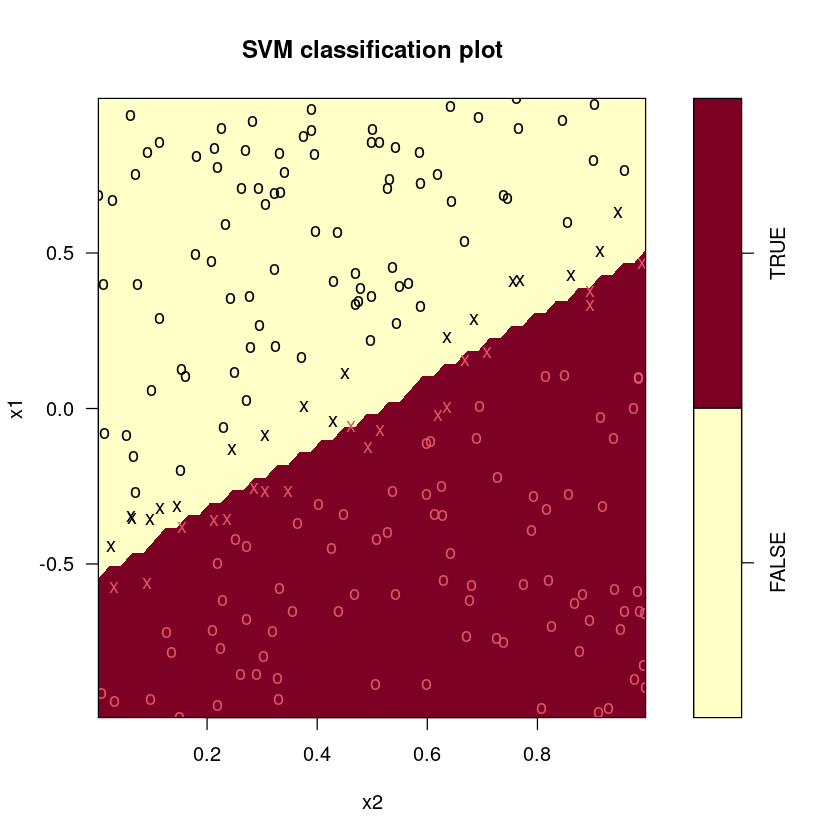

In [13]:
svm.model <- svm(g ~ ., data = dataTrainLin, type = "C", kernel = "lin", cross = 5)
plot(svm.model, data = dataTrainLin)

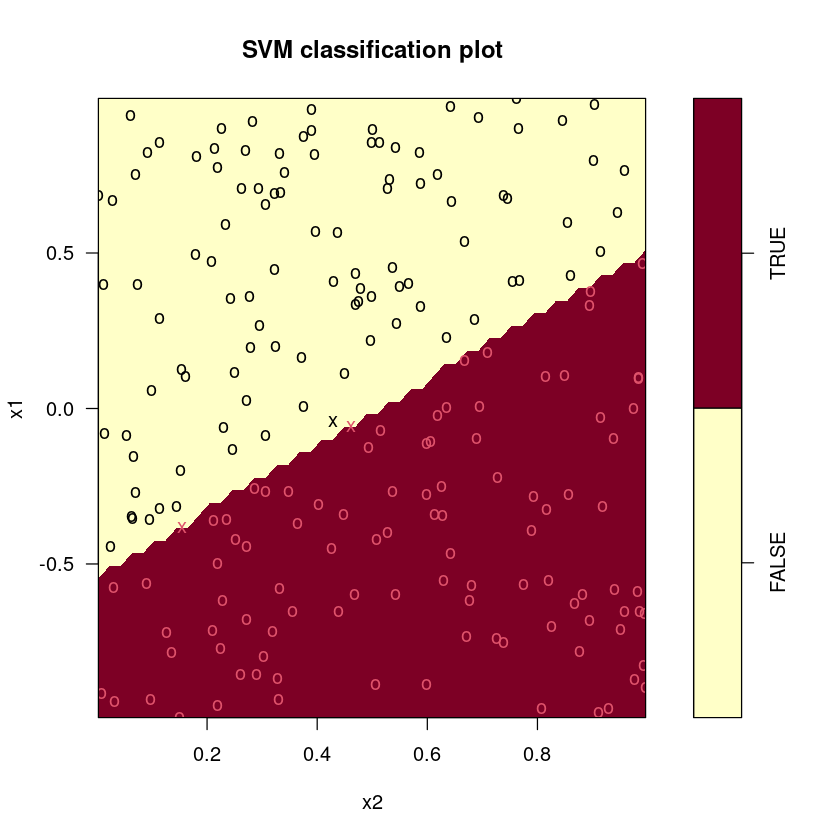

In [25]:
svm.model <- svm(g ~ ., data = dataTrainLin, type = "C", kernel = "lin", cross = 5, cost = 1000)
plot(svm.model, data = dataTrainLin)

In [14]:
summary(svm.model)


Call:
svm(formula = g ~ ., data = dataTrainLin, type = "C", kernel = "lin", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  36

 ( 18 18 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 99.5 
Single Accuracies:
 100 100 100 100 97.5 




**Q:** How many support vectors are there? How are they represented on the plot? 
What is their minimal number? Can you change the parameters, such that this minimal number is achieved?

The support vectors in this case are the x points in the plot, there are 36. \
The minimal number: is the number of points which are one the linear hyper plan. To attain this number, we can penilize more the number of missclassified points, i.e we can use a large value of `C` in the Lagrangien formula, i.e `cost` in this R function

**Q:** What are the `Single Accuracies` and the `Total Accuracy` in the `summary`? Why should we do some cross validation, even though there are no parameters to calibrate in the linear model?

Total accuracy: average accuracy during cross validation \
Single accuracies: accuracy for each subset during cross validation 

We still use cross validation to gain some insights of the generalization errors

**Q:** Verify that the fitted values are equal to the sign of the decision values. 

In [26]:
unique((svm.model$decision.values<0) == (svm.model$fitted))

,FALSE/TRUE
1,TRUE


Note that it is possible to get the normalized support vectors. 

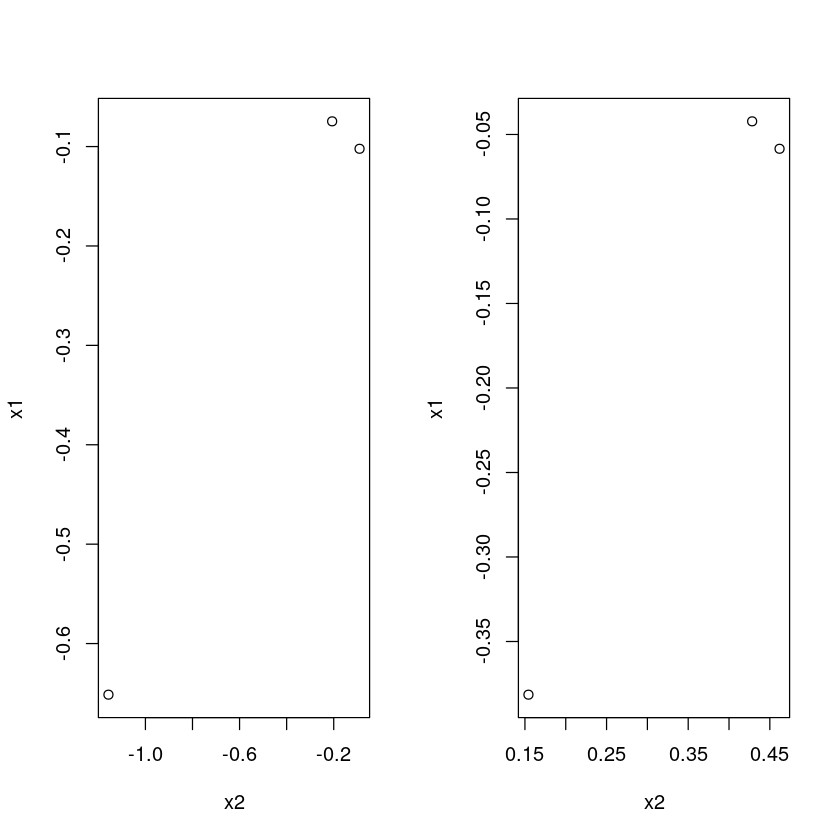

In [27]:
par(mfrow=c(1,2))
plot(x1~x2,data=svm.model$SV)
plot(x1~x2,data=dataTrainLin[svm.model$index,])

## Test set prediction

Let us now compute the contingency table and accuracy rate of `svm.model` on the test set. 

In [28]:
# Generalization error
pred.lin <- predict(svm.model,dataTestLin)
table(pred.lin,dataTestLin$g) 
paste("Generalization error: ",100*(1-sum(diag(table(pred.lin,dataTestLin$g)))/ntest),"%",sep="")

        
pred.lin FALSE TRUE
   FALSE    50    0
   TRUE      2   48

[1] "Generalization error: 2%"

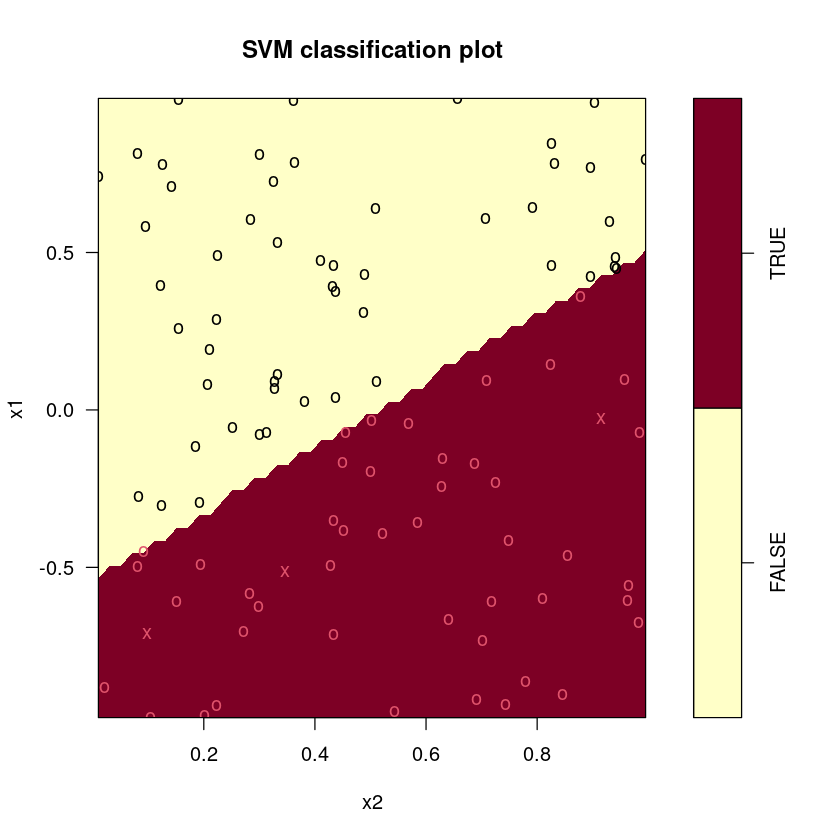

In [29]:
plot(svm.model,dataTestLin)

**Q:** Comment. 

There are some missclassified points in test set

# Cubic boundary

In this section, we assume that the points are separated by a cubic function (polynomial with degree 3). 

## Data simulation

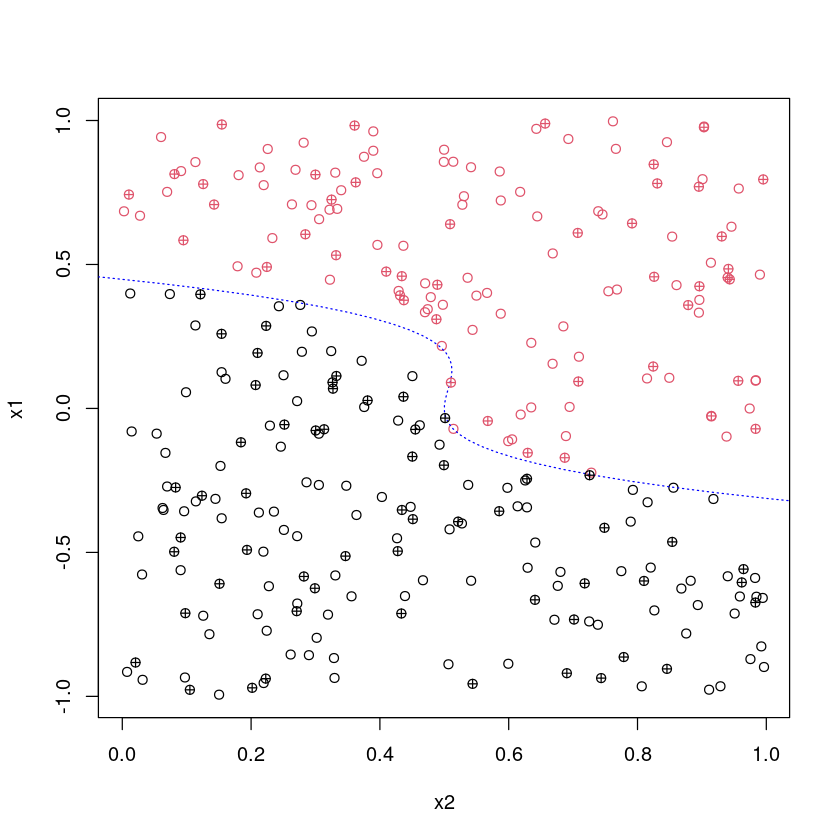

In [30]:
boundFunCub <- function(u){
  2*u^2 - 10*u^3 + 0.5
}

# Training set
gCub <- (x2 > boundFunCub(x1))
gCub <- as.factor(gCub)
dataTrainCub <- data.frame(x1 = x1, x2 = x2, g = gCub)
plot(x2, x1, col=as.numeric(gCub))
lines(boundFunCub(t), t, col="blue", lty = "dotted")

# Test set
gCubtest <- as.factor(x2test > boundFunCub(x1test))
dataTestCub <- data.frame(x1 = x1test, x2 = x2test, g = gCubtest)
points(x2test, x1test, col=as.numeric(gCubtest),pch=10)

## Linear SVM

With a linear kernel, we obtain the following.

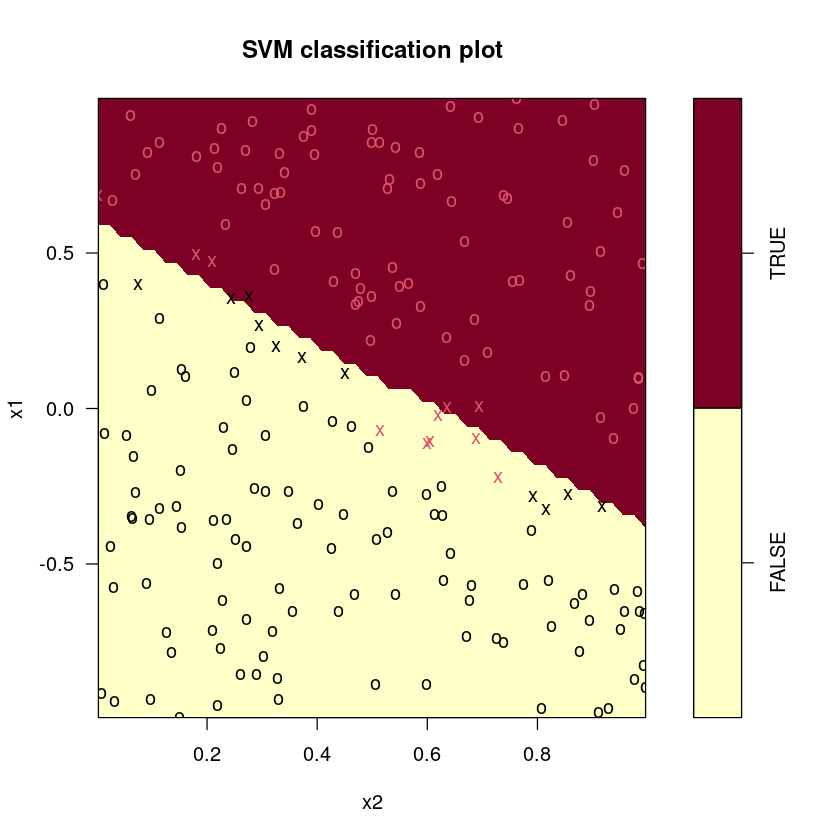

In [44]:
svm.Cub.lin <- svm(g ~ ., data = dataTrainCub, type = "C", kernel = "lin", cross = 5, cost = 10)
plot(svm.Cub.lin, data=dataTrainCub)

In [45]:
summary(svm.Cub.lin)


Call:
svm(formula = g ~ ., data = dataTrainCub, type = "C", kernel = "lin", 
    cross = 5, cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  22

 ( 11 11 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 95 
Single Accuracies:
 90 100 95 95 95 




**Q:** What is the generalization error here? Comment. 

In [46]:
pred.Cub.lin = predict(svm.Cub.lin, dataTestCub)
table(pred.Cub.lin, dataTestCub$g)
paste("Generalization error: ",100*(1-sum(diag(table(pred.Cub.lin, dataTestCub$g)))/ntest),"%",sep="")

            
pred.Cub.lin FALSE TRUE
       FALSE    56    3
       TRUE      0   41

[1] "Generalization error: 3%"

The generalization error here is 3%

## Polynomial SVM

Since we know here that the boundary is polynomial with degree 3, we can use a polynomial kernel.

### Polynomial kernel with default parameters

**Q:** What are the parameters of such kernel, and what is their default value?

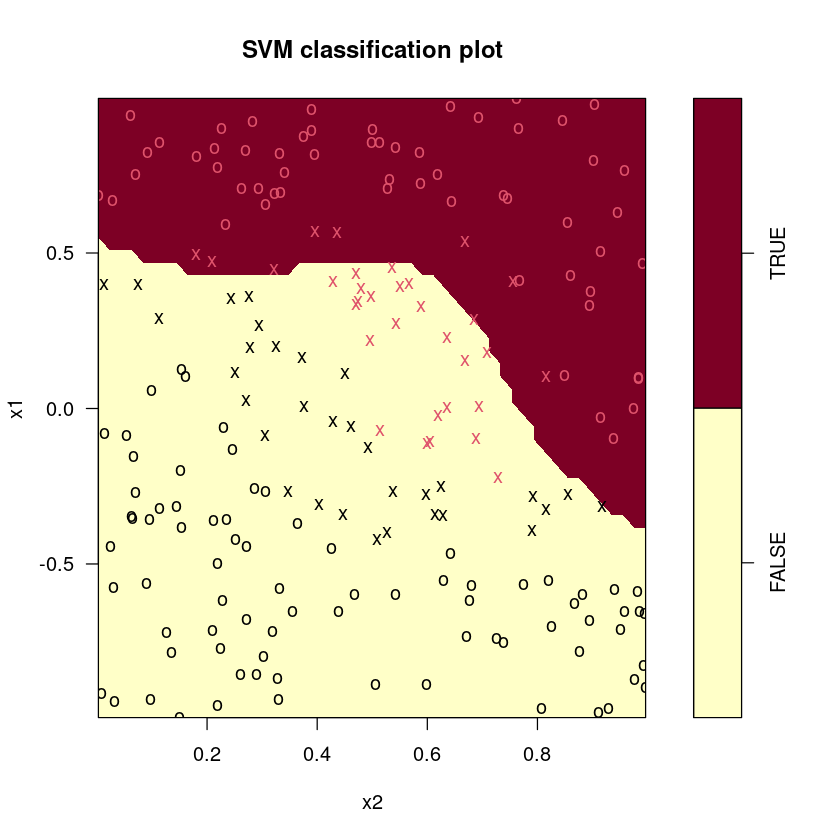

In [47]:
svm.Cub.poly <- svm(g ~ ., data = dataTrainCub, type = "C", kernel = "poly", cross = 5)
plot(svm.Cub.poly, data = dataTrainCub)

In [48]:
summary(svm.Cub.poly)


Call:
svm(formula = g ~ ., data = dataTrainCub, type = "C", kernel = "poly", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  64

 ( 32 32 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 88.5 
Single Accuracies:
 87.5 92.5 87.5 90 85 




**Q:** Does this model seem reasonable? What should we do to improve it?

There are too many missclassified points

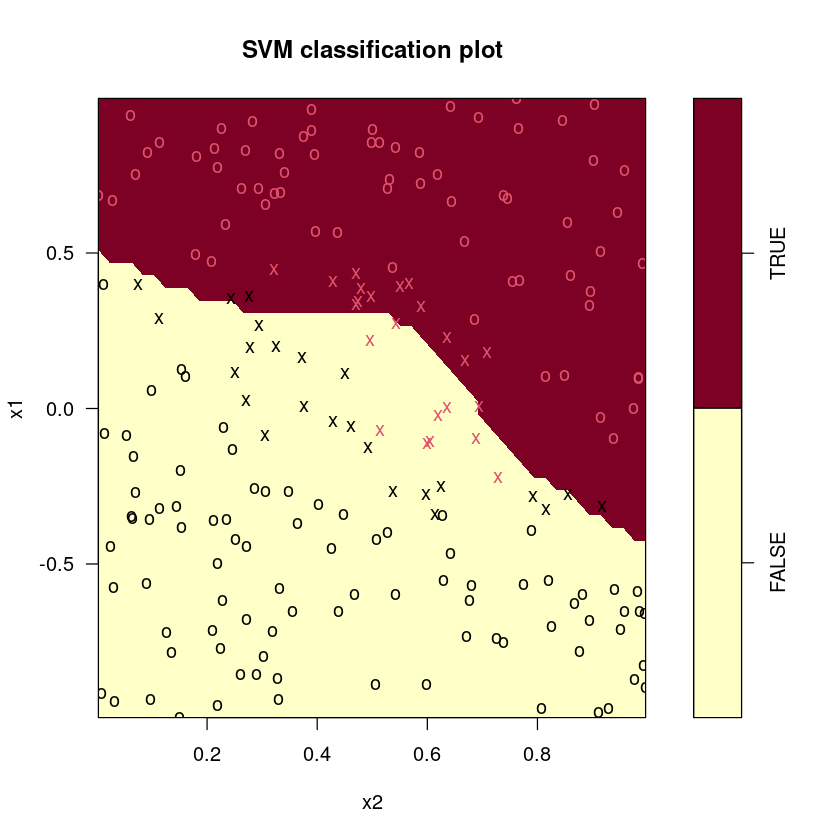

In [65]:
svm.Cub.poly.cost <- svm(g ~ ., data = dataTrainCub, type = "C", kernel = "poly", cross = 5, cost = 10)
plot(svm.Cub.poly.cost, data = dataTrainCub)

In order to study the training error, we can print the contingency table of the fitted values. 

In [49]:
table(svm.Cub.poly$fitted,dataTrainCub$g) # Il faudrait sur échantillon test !
paste("Training error: ",round(100*(1-sum(diag(table(svm.Cub.poly$fitted,dataTrainCub$g)))/nrow(dataTrainCub)),1),"%",sep="")

       
        FALSE TRUE
  FALSE   109   23
  TRUE      1   67

[1] "Training error: 12%"

**Q:** Comment.

### Tuned model

Since we know the degree in this example, we only tune the parameter `coef0`. 

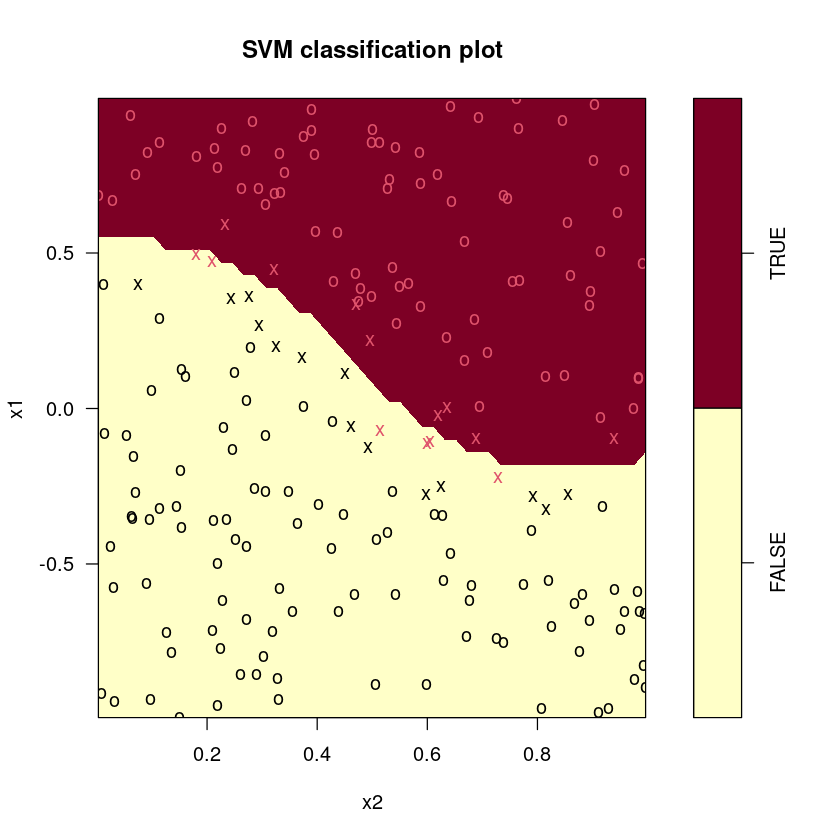

In [66]:
svm.Cub.poly.tune <- tune.svm(g ~ ., data = dataTrainCub, type = "C", kernel = "poly", coef0 = -5:5)
plot(svm.Cub.poly.tune$best.model, data = dataTrainCub)

In [67]:
# print(svm.Cub.poly.tune)
summary(svm.Cub.poly.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 coef0
     1

- best performance: 0.03 

- Detailed performance results:
   coef0 error dispersion
1     -5 0.175 0.09204468
2     -4 0.210 0.09660918
3     -3 0.220 0.09486833
4     -2 0.250 0.10540926
5     -1 0.290 0.13498971
6      0 0.135 0.07835106
7      1 0.030 0.03496029
8      2 0.035 0.03374743
9      3 0.035 0.03374743
10     4 0.030 0.03496029
11     5 0.030 0.03496029


**Q:** What value of `coef0` is obtained by cross validation? What is the generalization error in this case?

The best `coef0` is 1 with 0.03 generalization error

We can plot the generalization error (estimated by cross validation) w.r.t. `coef0`. 

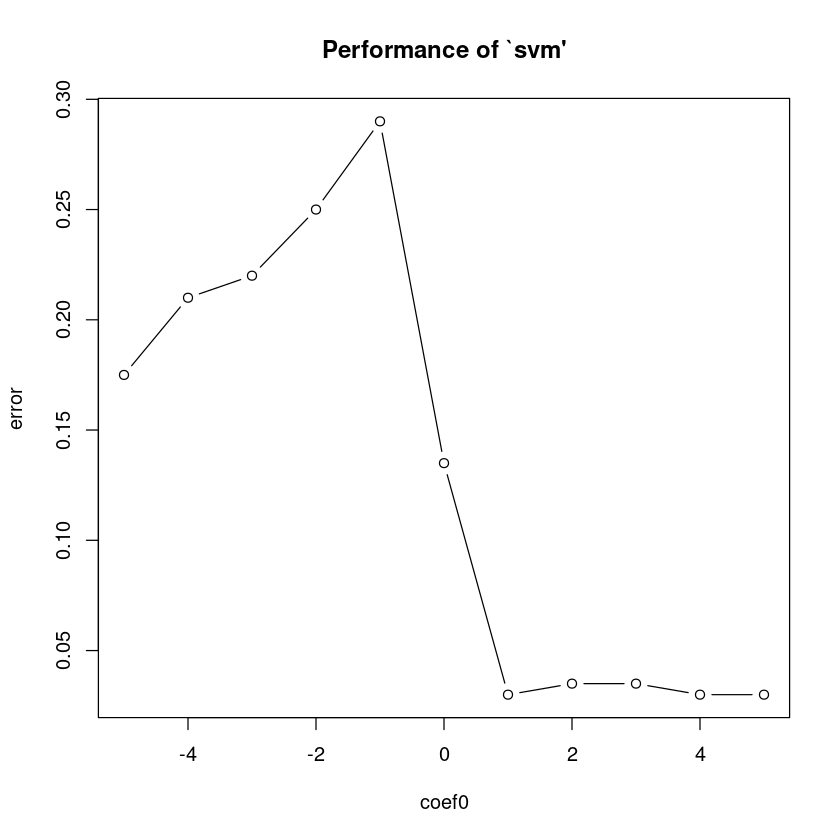

In [68]:
#svm.Cub.poly.tune$best.parameters
plot(svm.Cub.poly.tune)

**Q:** Which parameter minimizes the error?  

## Radial SVM 

### Radial kernel with default parameters

**Q:** What are the parameters of such kernel, and what is their default value?

exp(-gamma*|u-v|^2), default: 1/(data dimension)

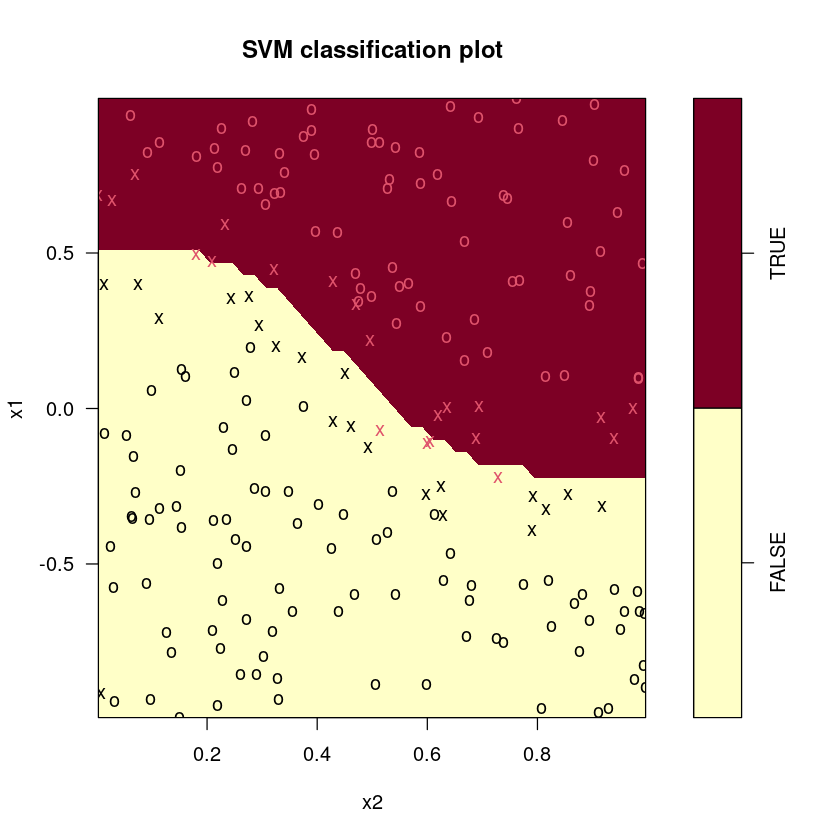

In [69]:
svm.Cub.rad <- svm(g ~ ., data = dataTrainCub, type = "C", kernel = "radial", cross = 5)
plot(svm.Cub.rad, data = dataTrainCub) 

In [70]:
summary(svm.Cub.rad)


Call:
svm(formula = g ~ ., data = dataTrainCub, type = "C", kernel = "radial", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  42

 ( 21 21 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 96 
Single Accuracies:
 97.5 97.5 97.5 92.5 95 




**Q:** How much is the generalization error (estimated by cross validation) here? Does the model seem reasonable?

4%, it seems reasonable here!

### Tuned model

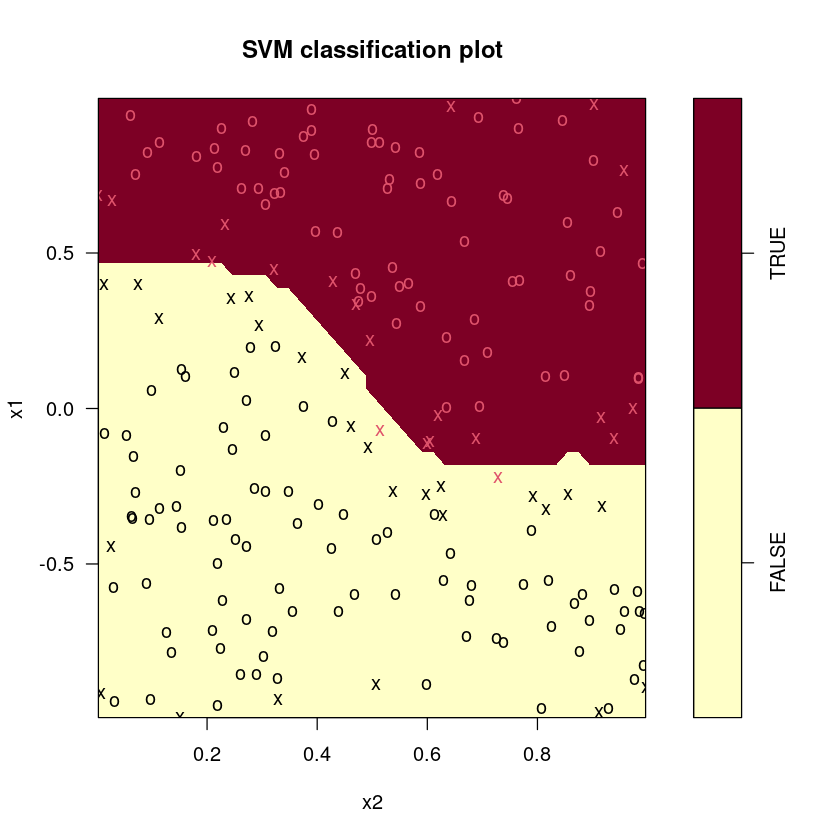

In [71]:
svm.Cub.rad.tune <- tune.svm(g ~ ., data = dataTrainCub, type = "C", kernel = "radial", gamma = seq(0.1, 2, by = 0.2))
plot(svm.Cub.rad.tune$best.model, data = dataTrainCub)

In [72]:
# print(svm.Cub.rad.tune)
summary(svm.Cub.rad.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma
   1.3

- best performance: 0.01 

- Detailed performance results:
   gamma error dispersion
1    0.1 0.040 0.05163978
2    0.3 0.025 0.03535534
3    0.5 0.020 0.03496029
4    0.7 0.025 0.03535534
5    0.9 0.020 0.03496029
6    1.1 0.015 0.02415229
7    1.3 0.010 0.02108185
8    1.5 0.010 0.02108185
9    1.7 0.010 0.02108185
10   1.9 0.010 0.02108185


 We can plot the estimated generalization error w.r.t. `gamma`. 

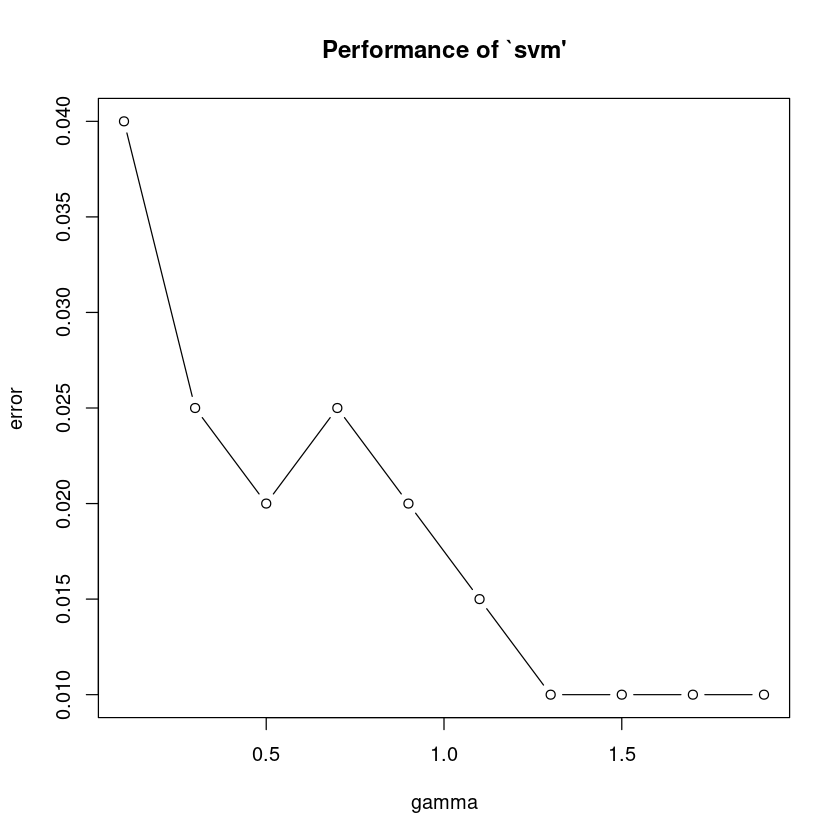

In [77]:
plot(svm.Cub.rad.tune)
# plot(error~gamma,data=svm.Cub.rad.tune$performances,type="b")
# svm.Cub.rad.tune$best.parameters

**Q:** Which parameter minimizes the error? What is the generalization error in that case? What is its values for the default parameter? 

Default value: 1/n = 1/200 = 0.005

## Model comparison

### Validation error (by cross validation)

Comparison of the cross-validation errors:

In [78]:
paste("Linear kernel:",100-svm.Cub.lin$tot.accuracy,"%",sep=" ")
paste("Default polynomial kernel:",100-svm.Cub.poly$tot.accuracy,"%",sep=" ")
paste("Tuned polynomial kernel:",100*(svm.Cub.poly.tune$best.performance),"%",sep=" ")
paste("Default radial kernel:",100-svm.Cub.rad$tot.accuracy,"%",sep=" ")
paste("Tuned radial kernel:",100*(svm.Cub.rad.tune$best.performance),"%",sep=" ")

[1] "Linear kernel: 5 %"

[1] "Default polynomial kernel: 11.5 %"

[1] "Tuned polynomial kernel: 3 %"

[1] "Default radial kernel: 4 %"

[1] "Tuned radial kernel: 1 %"

**Q:** Which model seems best?

### Test set prediction

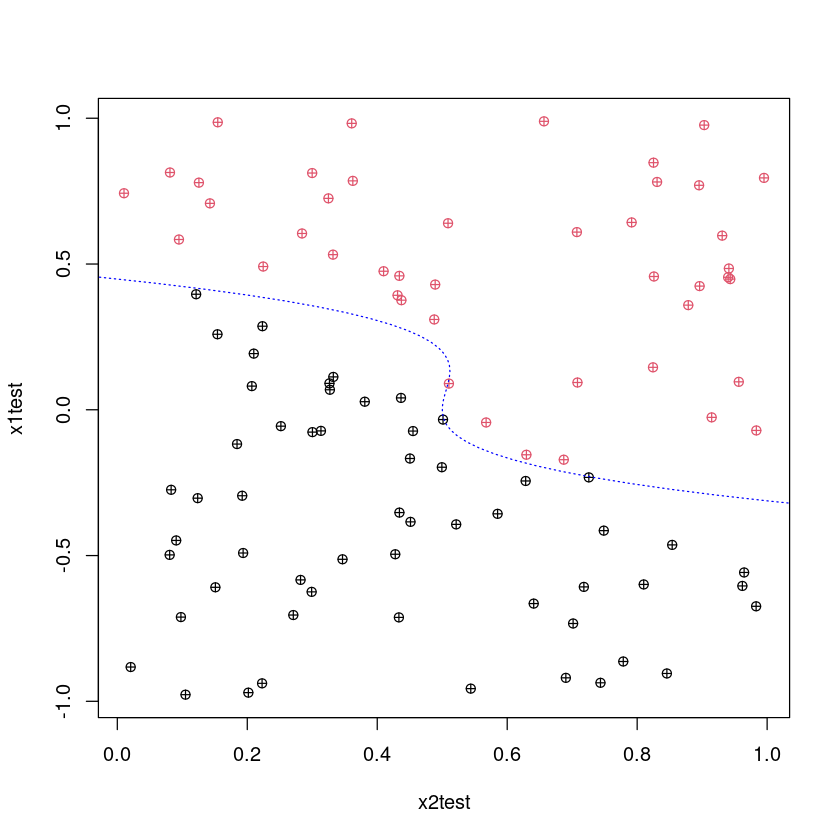

In [79]:
plot(x2test, x1test, col=as.numeric(gCubtest),pch=10)
lines(boundFunCub(t), t, col="blue", lty = "dotted")

            
pred.Cub.lin FALSE TRUE
       FALSE    56    3
       TRUE      0   41

[1] "Prediction error: 3 %"

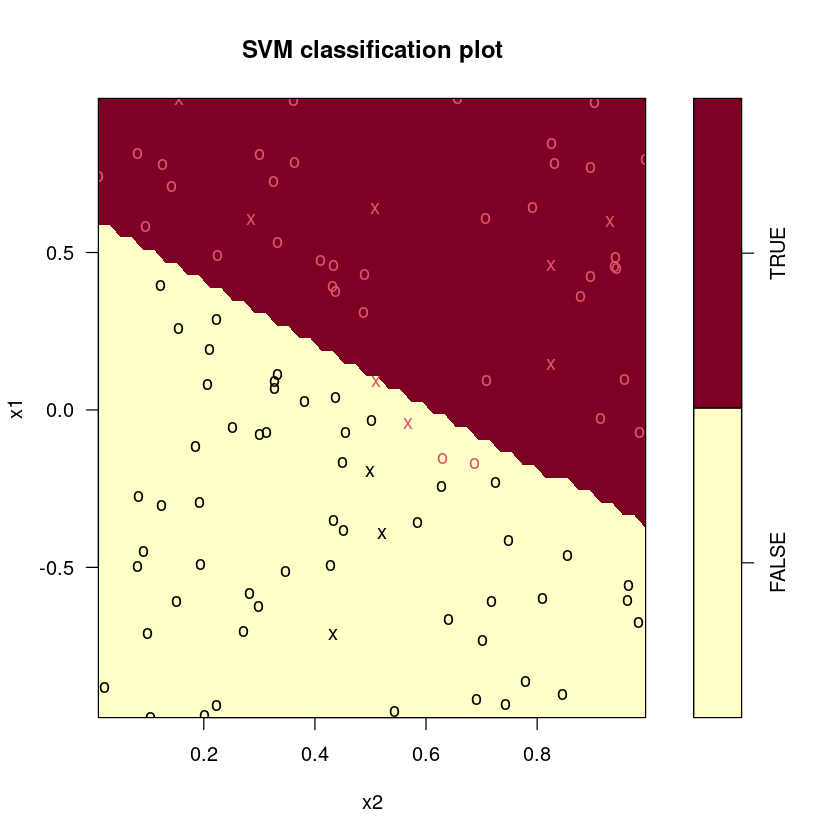

In [80]:
# Linear kernel
pred.Cub.lin <- predict(svm.Cub.lin,dataTestCub)
table(pred.Cub.lin,dataTestCub$g) 
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Cub.lin,dataTestCub$g)))/ntest),1)," %",sep="")
plot(svm.Cub.lin,dataTestCub)

             
pred.Cub.poly FALSE TRUE
        FALSE    56    9
        TRUE      0   35

[1] "Prediction error: 9 %"

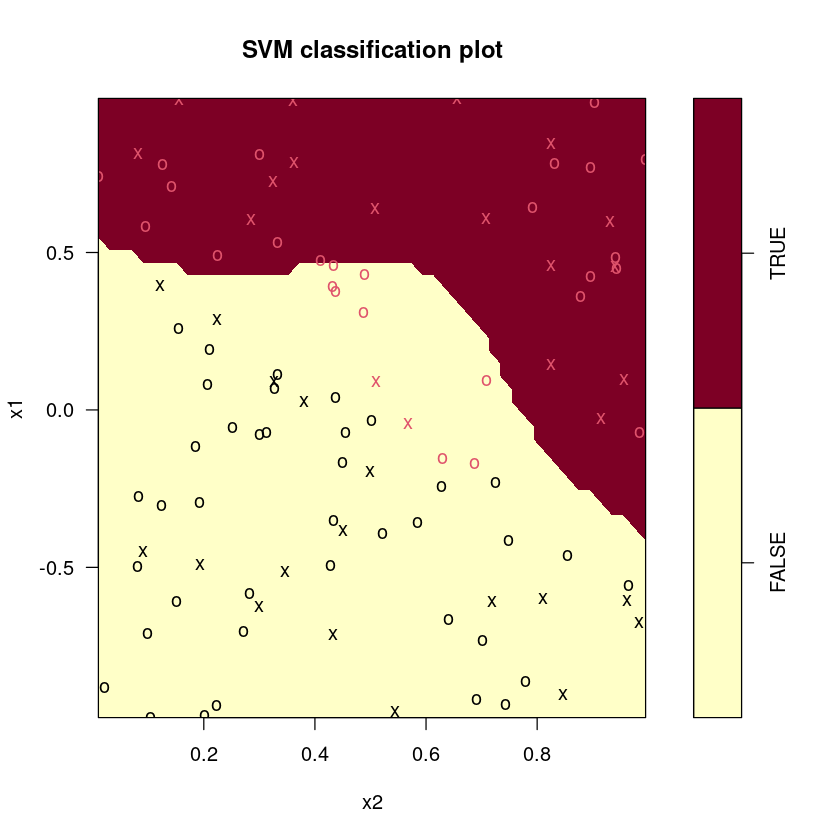

In [81]:
# Default polynomial kernel
pred.Cub.poly <- predict(svm.Cub.poly,dataTestCub)
table(pred.Cub.poly,dataTestCub$g) 
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Cub.poly,dataTestCub$g)))/ntest),1)," %",sep="")
plot(svm.Cub.poly,dataTestCub)

                  
pred.Cub.poly.tune FALSE TRUE
             FALSE    56    3
             TRUE      0   41

[1] "Prediction error: 3 %"

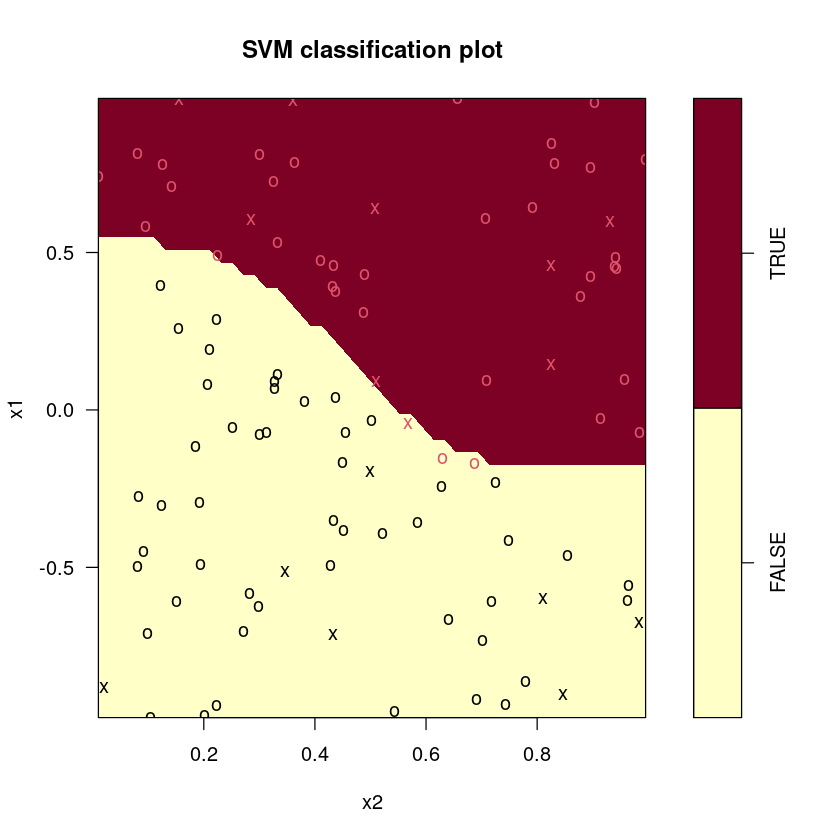

In [82]:
# Tuned polynomial kernel
pred.Cub.poly.tune <- predict(svm.Cub.poly.tune$best.model,dataTestCub)
table(pred.Cub.poly.tune,dataTestCub$g) 
paste("Prediction error: ",100*(1-sum(diag(table(pred.Cub.poly.tune,dataTestCub$g)))/ntest)," %",sep="")
plot(svm.Cub.poly.tune$best.model,dataTestCub)

            
pred.Cub.rad FALSE TRUE
       FALSE    56    1
       TRUE      0   43

[1] "Prediction error: 1 %"

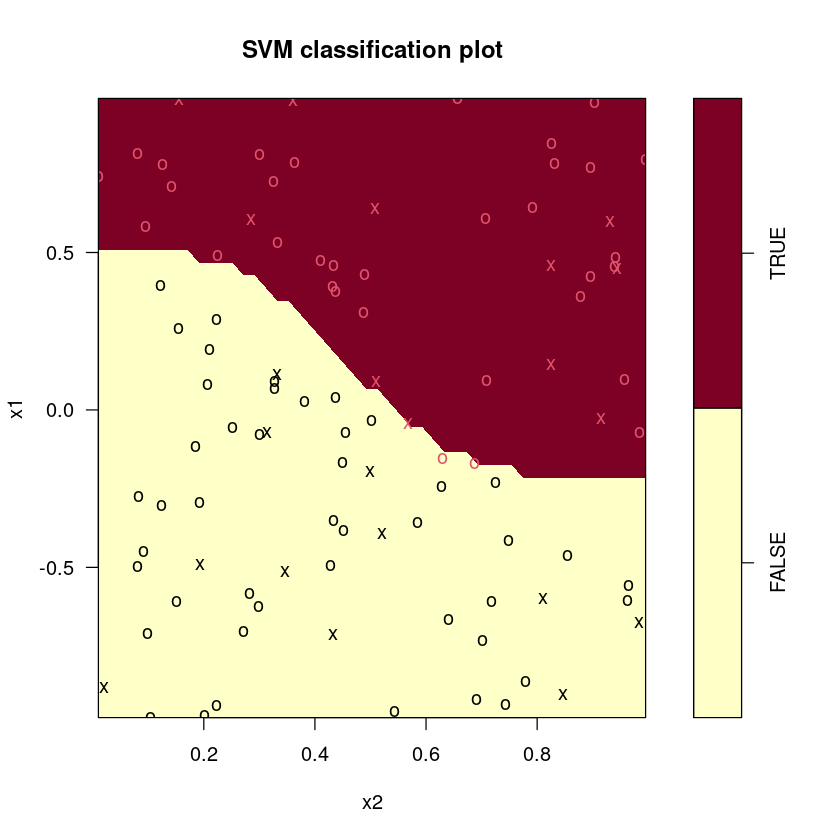

In [83]:
# Default radial kernel
pred.Cub.rad <- predict(svm.Cub.rad,dataTestCub)
table(pred.Cub.rad,dataTestCub$g) 
paste("Prediction error: ",100*(1-sum(diag(table(pred.Cub.rad,dataTestCub$g)))/ntest)," %",sep="")
plot(svm.Cub.rad,dataTestCub)

                 
pred.Cub.rad.tune FALSE TRUE
            FALSE    56    0
            TRUE      0   44

[1] "Prediction error: 0 %"

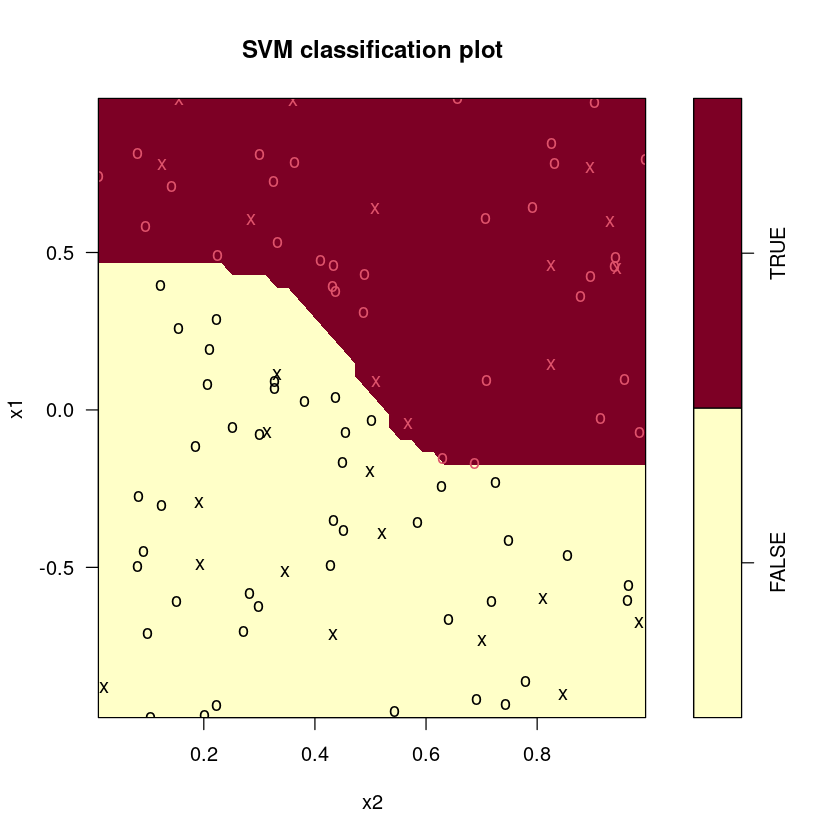

In [86]:
# Tuned radial kernel
pred.Cub.rad.tune <- predict(svm.Cub.rad.tune$best.model,dataTestCub)
table(pred.Cub.rad.tune,dataTestCub$g) 
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Cub.rad.tune,dataTestCub$g)))/ntest),1)," %",sep="")
plot(svm.Cub.rad.tune$best.model,dataTestCub)

In [85]:
# Prediction accuracies
paste("Linear kernel:",round(100*(1-sum(diag(table(pred.Cub.lin,dataTestCub$g)))/ntest),1),"%",sep=" ")
paste("Default polynomial kernel:",round(100*(1-sum(diag(table(pred.Cub.poly,dataTestCub$g)))/ntest)),"%",sep=" ")
paste("Tuned polynomial kernel:",round(100*(1-sum(diag(table(pred.Cub.poly.tune,dataTestCub$g)))/ntest)),"%",sep=" ")
paste("Default radial kernel:",round(100*(1-sum(diag(table(pred.Cub.rad,dataTestCub$g)))/ntest)),"%",sep=" ")
paste("Tuned radial kernel:",round(100*(1-sum(diag(table(pred.Cub.rad.tune,dataTestCub$g)))/ntest)),"%",sep=" ")

[1] "Linear kernel: 3 %"

[1] "Default polynomial kernel: 9 %"

[1] "Tuned polynomial kernel: 3 %"

[1] "Default radial kernel: 1 %"

[1] "Tuned radial kernel: 0 %"

**Q:** Conclude. 

# Absolute value boundary

In this section, we assume that the points are separated by an absolute value function. 

## Data simulation

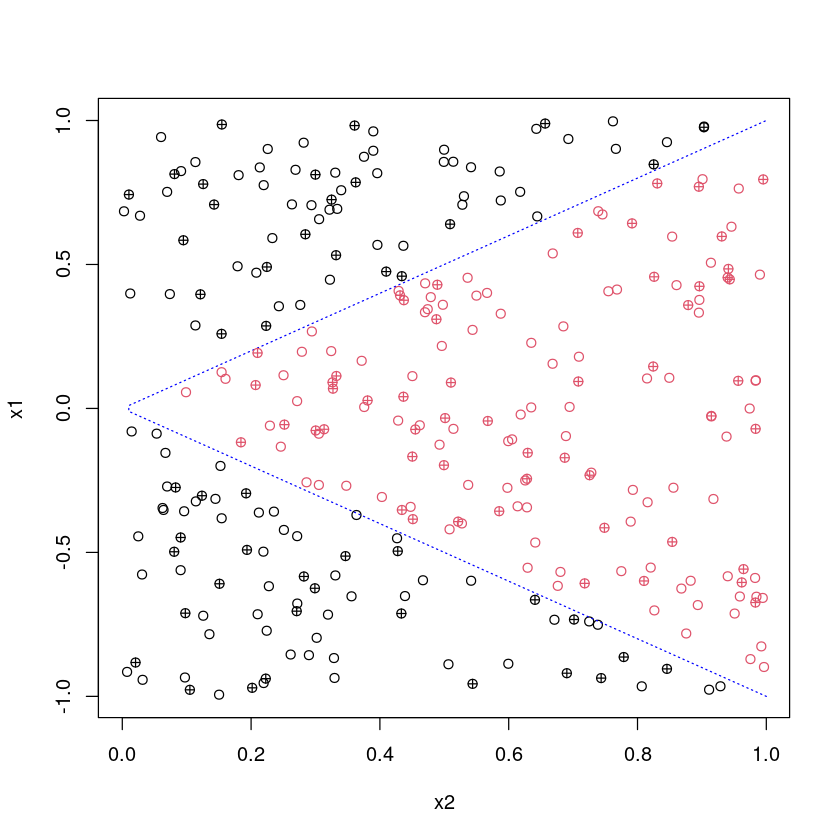

In [87]:
boundFunAbs <- function(x1){
  abs(x1)
}

# Training set
gAbs <- (x2 > boundFunAbs(x1))
gAbs <- as.factor(gAbs)
dataTrainAbs <- data.frame(x1 = x1, x2 = x2, g = gAbs)
plot(x2, x1, col=as.numeric(gAbs))
lines(boundFunAbs(t), t, col="blue", lty = "dotted")

# Test set
gAbstest <- as.factor(x2test > boundFunAbs(x1test))
dataTestAbs <- data.frame(x1 = x1test, x2 = x2test, g = gAbstest)
points(x2test, x1test, col=as.numeric(gAbstest),pch=10)

## Radial SVM

### Radial kernel with default parameters

**Q:** Train a first SVM classifier `svm.Abs.rad` based on a radial kernel with default parameters. 


Call:
svm(formula = g ~ ., data = dataTrainAbs, type = "C", kernel = "rad", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  68

 ( 34 34 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 92.5 
Single Accuracies:
 92.5 95 92.5 92.5 90 




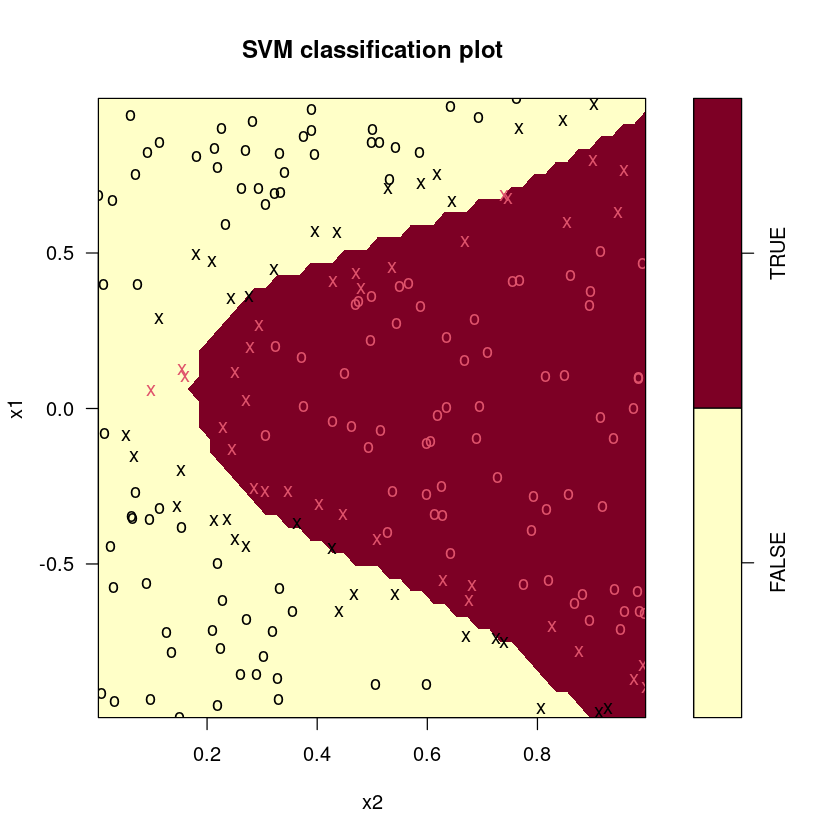

In [93]:
svm.Abs.rad = svm(g ~ ., data= dataTrainAbs, type = 'C', kernel = "rad", cross = 5 )
plot(svm.Abs.rad, dataTrainAbs)
summary(svm.Abs.rad)

### Radial kernel with `cost=1000`

**Q:** Train a second SVM classifier `svm.Abs.rad.cost1000` based on a radial kernel with default parameters, with `cost=1000`. What can you observe? 
What is the effect of the cost w.r.t. overfitting?


Call:
svm(formula = g ~ ., data = dataTrainAbs, type = "C", kernel = "rad", 
    cross = 5, cost = 1000)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1000 

Number of Support Vectors:  13

 ( 7 6 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 96.5 
Single Accuracies:
 100 100 100 82.5 100 




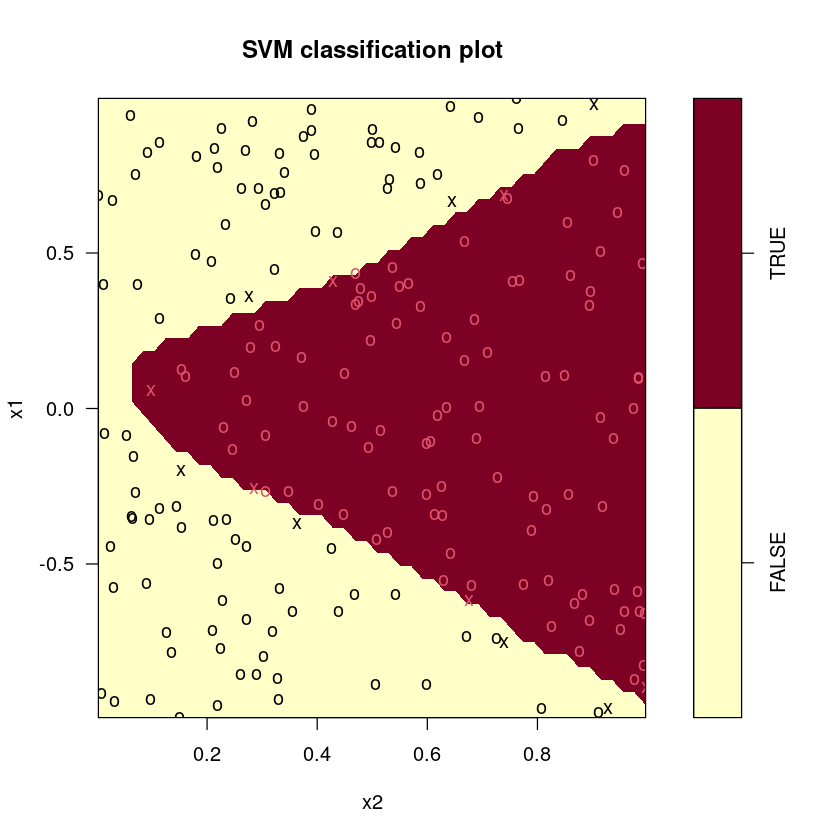

In [94]:
svm.Abs.rad.cost1000 = svm(g ~ ., data= dataTrainAbs, type = 'C', kernel = "rad", cross = 5, cost = 1000 )
plot(svm.Abs.rad.cost1000, dataTrainAbs)
summary(svm.Abs.rad.cost1000)

### Tuned radial model

**Q:** Tune a third model `svm.Abs.rad.tune` based on a radial kernel by cross validation. The parameters can be taken in the following grids: 
- `gamma = seq(0.1, 2, by = 0.2)`, 
- `cost = c(1, 25, 50, 75, 100, 150, 200)`. 

In [109]:
svm.Abs.rad.tune = tune.svm(g ~ ., data= dataTrainAbs, type = 'C', kernel = "radial", gamma = seq(0.1, 2, by = 0.2),cost = c(1, 25, 50, 75, 100, 150, 200), cross = 5)
# plot(svm.Abs.rad.tune$best.model, dataTrainAbs)
summary(svm.Abs.rad.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.5   50

- best performance: 0.005 

- Detailed performance results:
   gamma cost error dispersion
1    0.1    1 0.115 0.09442810
2    0.3    1 0.075 0.04859127
3    0.5    1 0.070 0.04216370
4    0.7    1 0.055 0.04972145
5    0.9    1 0.060 0.05676462
6    1.1    1 0.050 0.04714045
7    1.3    1 0.055 0.04972145
8    1.5    1 0.050 0.04714045
9    1.7    1 0.055 0.04377975
10   1.9    1 0.050 0.03333333
11   0.1   25 0.040 0.03944053
12   0.3   25 0.020 0.02581989
13   0.5   25 0.015 0.02415229
14   0.7   25 0.010 0.02108185
15   0.9   25 0.010 0.02108185
16   1.1   25 0.010 0.02108185
17   1.3   25 0.010 0.02108185
18   1.5   25 0.010 0.02108185
19   1.7   25 0.015 0.02415229
20   1.9   25 0.010 0.02108185
21   0.1   50 0.020 0.03496029
22   0.3   50 0.010 0.02108185
23   0.5   50 0.005 0.01581139
24   0.7   50 0.010 0.02108185
25   0.9   50 0.010 0.02108185
26   1.1   50 0

In [110]:
svm.Abs.rad.tune$best.parameters

,gamma,cost
,<dbl>,<dbl>
23,0.5,50


**Q:** For which parameters is the generalization error the smallest? What is its value in that case? 

**Q:** Plot the generalization error w.r.t `gamma` and `cost`. What do you observe?

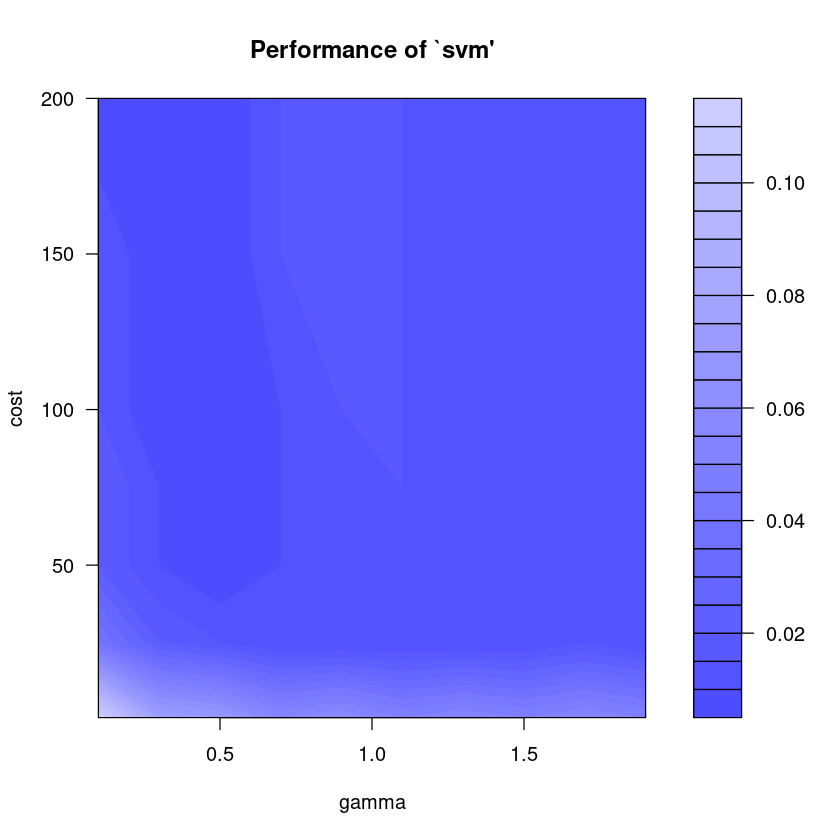

In [111]:
plot(svm.Abs.rad.tune)

## Test set prediction

**Q:** Compare the three radial models `svm.Abs.rad`, `svm.Abs.rad.tune.cost1000` and `svm.Abs.rad.tune` on the test set (in terms of contingency table and generalization error). Comment. 

In [119]:
pred.svm.Abs.rad = predict(svm.Abs.rad, dataTestAbs)
table(pred.svm.Abs.rad, dataTestAbs$g)
(1 - sum(diag(table(pred.svm.Abs.rad, dataTestAbs$g)))/ntest)*100

                
pred.svm.Abs.rad FALSE TRUE
           FALSE    43    1
           TRUE      4   52

[1] 5

In [122]:
paste("Generalization error svm.Abs.rad: ",100*(1-sum(diag(table(predict(svm.Abs.rad, dataTestAbs),dataTestAbs$g)))/ntest),"%",sep="")
paste("Generalization error svm.Abs.rad.cost1000: ",100*(1-sum(diag(table(predict(svm.Abs.rad.cost1000, dataTestAbs),dataTestAbs$g)))/ntest),"%",sep="")
paste("Generalization error svm.Abs.rad.tune: ",100*(1-sum(diag(table(predict(svm.Abs.rad.tune$best.model, dataTestAbs),dataTestAbs$g)))/ntest),"%",sep="")

[1] "Generalization error svm.Abs.rad: 5%"

[1] "Generalization error svm.Abs.rad.cost1000: 1%"

[1] "Generalization error svm.Abs.rad.tune: 1%"

# Sine boundary

## Data simulation

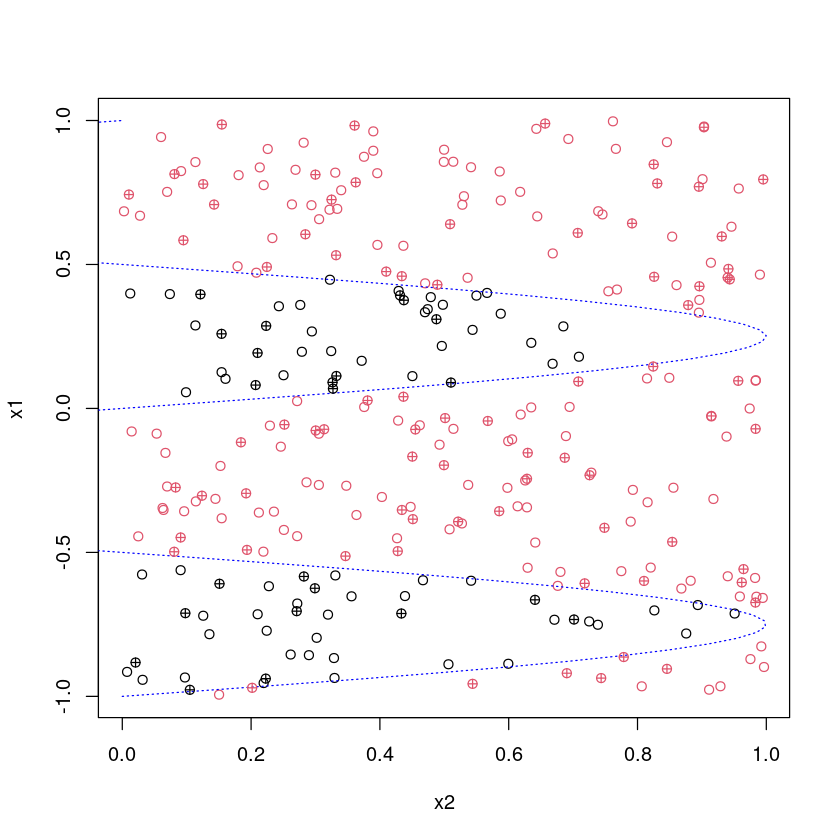

In [123]:
boundFunSin <- function(x1){
  sin(2*pi*x1)
}

# Training set
gSin <- (x2 > boundFunSin(x1))
gSin <- as.factor(gSin)
dataTrainSin <- data.frame(x1 = x1, x2 = x2, g = gSin)
plot(x2, x1, col=as.numeric(gSin))
lines(boundFunSin(t), t, col="blue", lty = "dotted")

# Test set
gSintest <- as.factor(x2test > boundFunSin(x1test))
dataTestSin <- data.frame(x1 = x1test, x2 = x2test, g = gSintest)
points(x2test, x1test, col=as.numeric(gSintest),pch=10)


**Q:** Same questions as for the Absolute value boundary case (with radial kernels). 

## Radial SVM

### Default parameters


Call:
svm(formula = g ~ ., data = dataTrainSin, type = "C", kernel = "rad", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  107

 ( 55 52 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 78.5 
Single Accuracies:
 77.5 82.5 85 65 82.5 




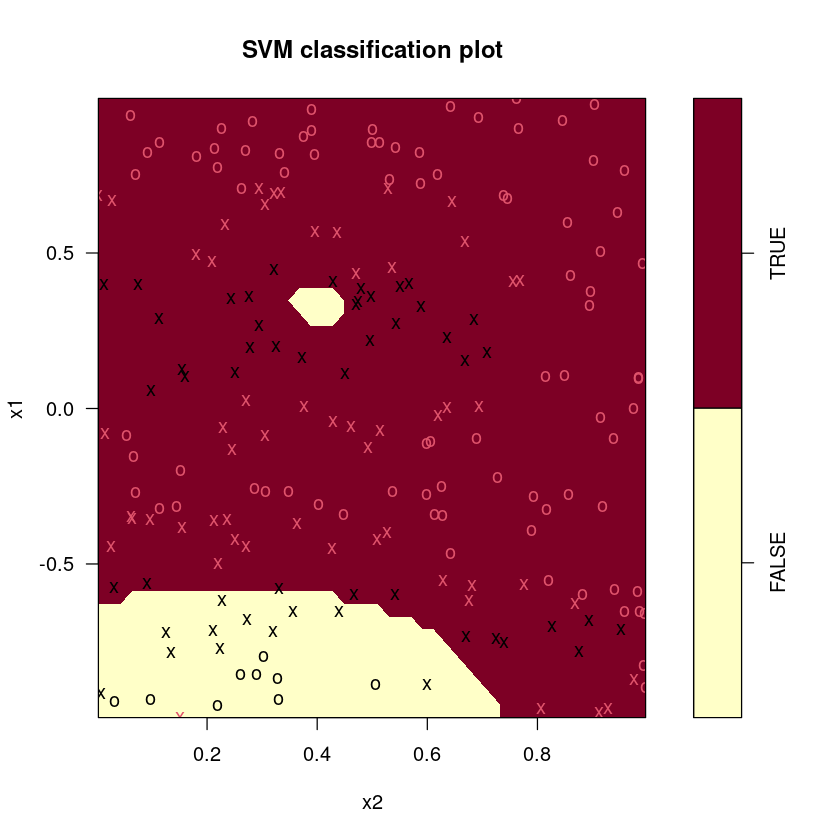

In [128]:
svm.Sin.rad = svm(g ~ ., data = dataTrainSin, type = 'C', kernel = 'rad', cross = 5)
summary(svm.Sin.rad)
plot(svm.Sin.rad, dataTrainSin)

### With `cost=1000`


Call:
svm(formula = g ~ ., data = dataTrainSin, type = "C", kernel = "rad", 
    cross = 5, cost = 1000)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1000 

Number of Support Vectors:  29

 ( 15 14 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 95.5 
Single Accuracies:
 100 95 97.5 92.5 92.5 




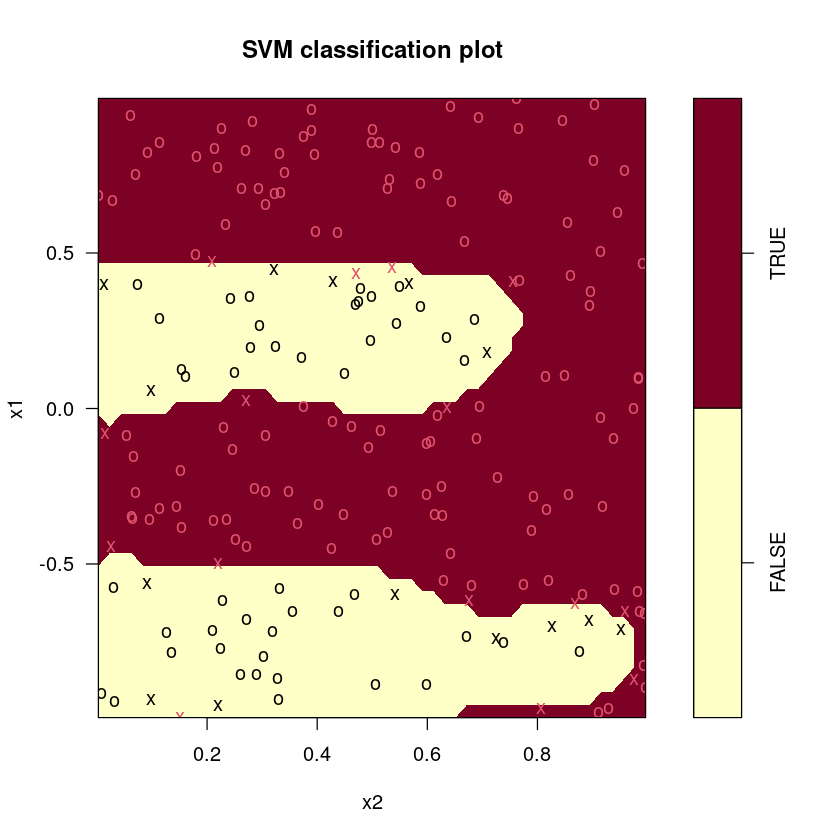

In [129]:
svm.Sin.rad.cost1000 = svm(g ~ ., data = dataTrainSin, type = 'C', kernel = 'rad', cross = 5, cost = 1000)
summary(svm.Sin.rad.cost1000)
plot(svm.Sin.rad.cost1000, dataTrainSin)

### Tuned model


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   1.3  150

- best performance: 0.015 

- Detailed performance results:
    gamma cost error dispersion
1     0.1    1 0.250 0.10540926
2     0.2    1 0.210 0.08755950
3     0.3    1 0.215 0.08514693
4     0.4    1 0.215 0.08514693
5     0.5    1 0.215 0.07835106
6     0.6    1 0.160 0.08432740
7     0.7    1 0.140 0.06582806
8     0.8    1 0.130 0.06749486
9     0.9    1 0.115 0.06258328
10    1.0    1 0.105 0.04972145
11    1.1    1 0.100 0.04082483
12    1.2    1 0.090 0.03944053
13    1.3    1 0.080 0.04216370
14    1.4    1 0.080 0.04216370
15    1.5    1 0.080 0.04216370
16    1.6    1 0.080 0.04216370
17    1.7    1 0.080 0.04216370
18    1.8    1 0.080 0.04216370
19    1.9    1 0.080 0.04216370
20    2.0    1 0.080 0.04216370
21    0.1    5 0.210 0.08755950
22    0.2    5 0.220 0.08232726
23    0.3    5 0.195 0.08959787
24    0.4    5 0.135 0.05296750
25    0.5    5 0.105 

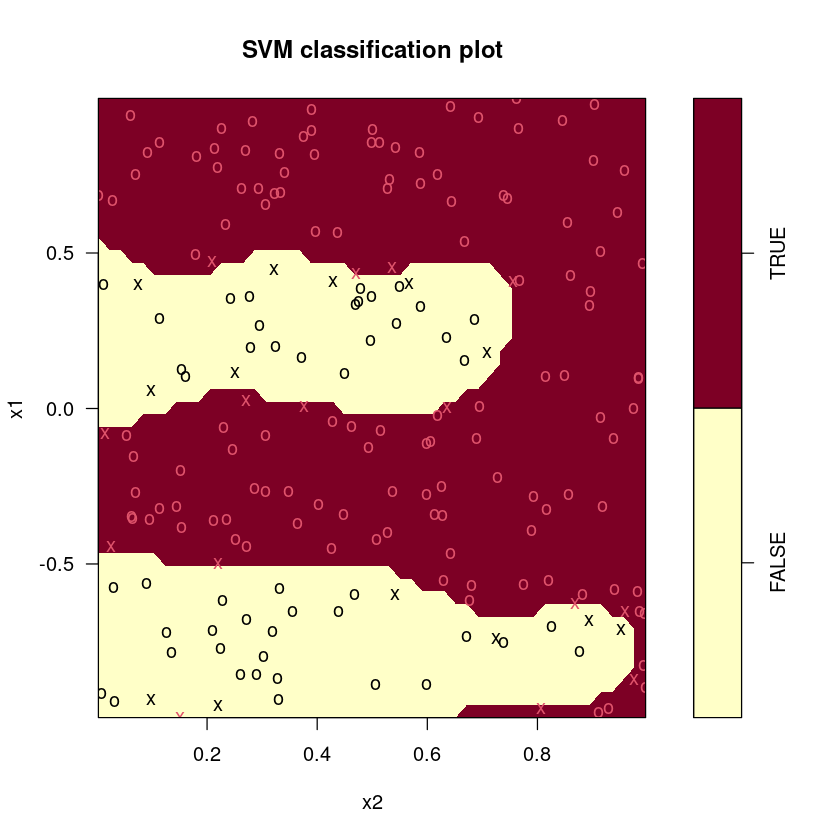

In [130]:
svm.Sin.rad.tune = tune.svm(g ~ ., data = dataTrainSin, type = 'C', kernel = 'rad', cross = 5, gamma = seq(0.1,2,by=0.1), cost = c(1,5,10,20,30,50,100,150,200,500))
summary(svm.Sin.rad.tune)
plot(svm.Sin.rad.tune$best.model, dataTrainSin)

,gamma,cost
,<dbl>,<dbl>
153,1.3,150


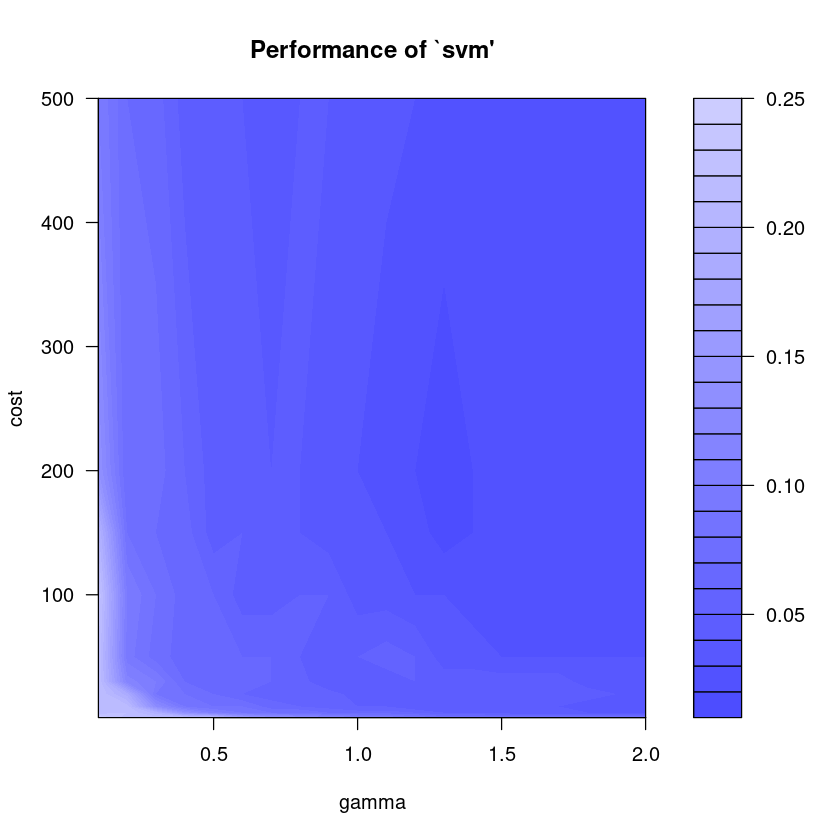

In [133]:
plot(svm.Sin.rad.tune)
svm.Sin.rad.tune$best.parameters

## Model comparison

### Validation error (by cross validation)

In [140]:
svm.Sin.rad$tot.acc

[1] 78.5

In [143]:
paste("Generalization in val set error svm.Sin.rad: ",svm.Sin.rad$tot.acc)
paste("Generalization in val set error svm.Sin.rad.cost1000: ",svm.Sin.rad.cost1000$tot.acc)
paste("Generalization in val set error svm.Sin.rad.tune: ",svm.Sin.rad.tune$best.model$tot.acc)

[1] "Generalization in val set error svm.Sin.rad:  78.5"

[1] "Generalization in val set error svm.Sin.rad.cost1000:  95.5"

[1] "Generalization in val set error svm.Sin.rad.tune:  95.5"

### Test set prediction

In [136]:
paste("Generalization in test set error svm.Sin.rad: ",100*(1-sum(diag(table(predict(svm.Sin.rad, dataTestSin),dataTestSin$g)))/ntest),"%",sep="")
paste("Generalization in test set error svm.Sin.rad.cost1000: ",100*(1-sum(diag(table(predict(svm.Sin.rad.cost1000, dataTestSin),dataTestSin$g)))/ntest),"%",sep="")
paste("Generalization in test set error svm.Sin.rad.tune: ",100*(1-sum(diag(table(predict(svm.Sin.rad.tune$best.model, dataTestSin),dataTestSin$g)))/ntest),"%",sep="")

[1] "Generalization in test set error svm.Sin.rad: 18%"

[1] "Generalization in test set error svm.Sin.rad.cost1000: 8%"

[1] "Generalization in test set error svm.Sin.rad.tune: 8%"

# Disk boundary

## Data simulation

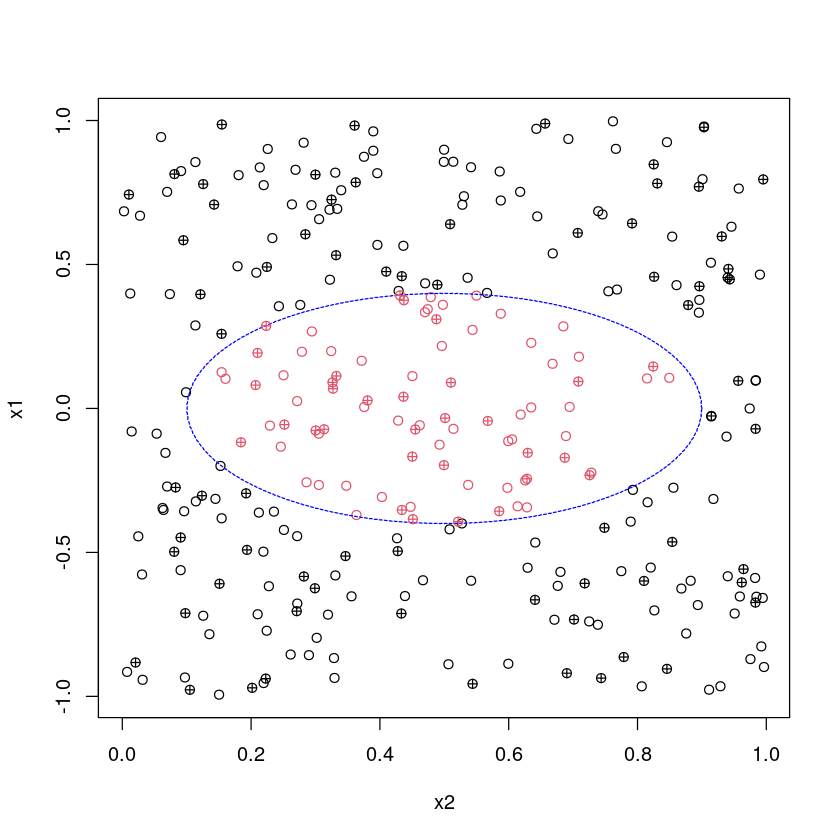

In [144]:
boundFunDisk <- function(x1, x2){
   x1^2 + (x2 - 1/2)^2
}
r <- 0.4

# Training set
gDisk <- as.factor(boundFunDisk(x1, x2) < r^2)
dataTrainDisk <- data.frame(x1 = x1, x2 = x2, g = gDisk)
plot(x2, x1, col=as.numeric(gDisk))
lines(1/2 + r * cos(2*pi*t), r * sin(2*pi*t), col="blue", lty = "dotted")

# Test set
gDisktest <- as.factor(boundFunDisk(x1test, x2test) < r^2)
dataTestDisk <- data.frame(x1 = x1test, x2 = x2test, g = gDisktest)
points(x2test, x1test, col=as.numeric(gDisktest),pch=10)


**Q:** Same questions as for the Absolute value boundary case (with polynomial and radial kernels). 

## Polynomial SVM

### Default parameters


Call:
svm(formula = g ~ ., data = dataTrainDisk, type = "C", kernel = "poly", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  105

 ( 56 49 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 75.5 
Single Accuracies:
 77.5 77.5 75 75 72.5 




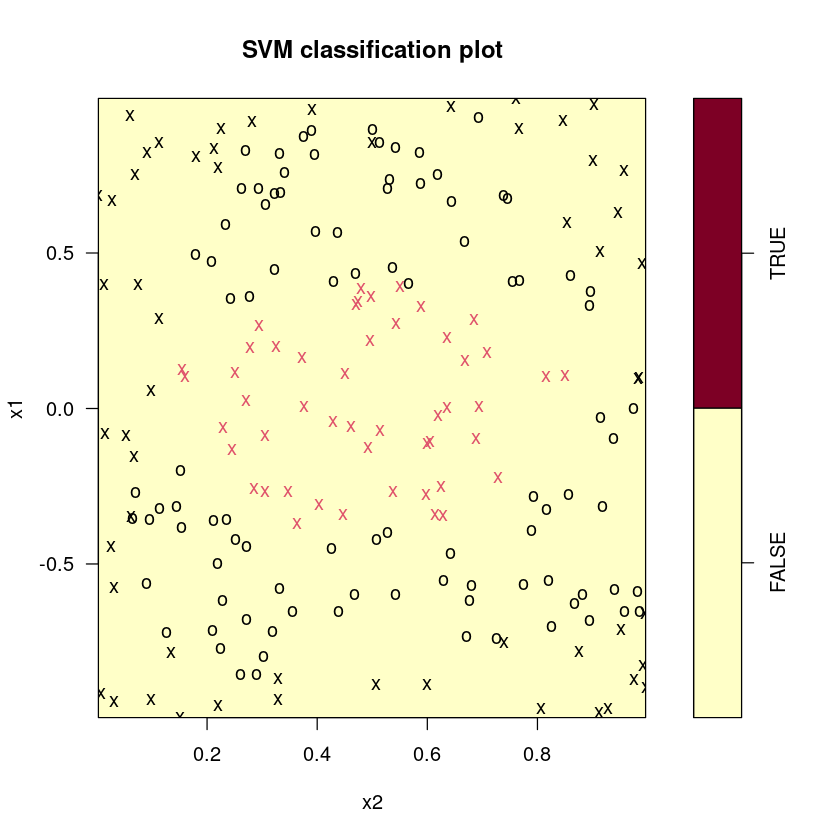

In [147]:
svm.Disk.poly = svm(g ~ ., data = dataTrainDisk, type = 'C', kernel = "poly", cross = 5)
plot(svm.Disk.poly, dataTrainDisk)
summary(svm.Disk.poly)

### Tuned model

## Radial SVM 

### Default parameters

### Tuned model

## Model comparison

### Validation error (by cross validation)

### Test set prediction